In [1]:
import csv
import glob
import os
import re
import random
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.chdir('C://Users//Ruben//Documents//Scriptie//test-scripts///metadata//nvdd-1815-1914')
csv_filenames = glob.glob('*.csv')

In [94]:
counts = pd.DataFrame()
list_newspaper_titles = list()

for csv in csv_filenames:
    df = pd.read_csv(csv, sep = "\t")
    df['date'] = df['date'].str[:4]
    df['date'] = df['date'].astype(int)
    
    csv_count = dict()
    
    for year in list(set(df.date)):
        y_df = df[df['date'] == year]
        
        year_count = 0
        
        for art in y_df.ocr:
            tmp = len(art)
            year_count = year_count + tmp
        
        yc_v = {year:year_count}
        csv_count.update(yc_v)
    
    csv_count_df = pd.DataFrame(list(csv_count.items()), columns=['year', 'char_count'])
    csv_count_df['title'] = csv[0:3]
    
    list_newspaper_titles.append(csv[0:3])
    list_newspaper_titles = [w.replace("-", "") for w in list_newspaper_titles]
    
    
    counts = counts.append(csv_count_df)   
counts = counts.pivot(index='year',columns='title')
counts['Total'] = counts.sum(axis=1)
counts['year'] = counts.index
list_newspaper_titles.extend(('total', 'year'))
counts.columns = list_newspaper_titles

In [95]:
list_newspaper_titles

['arc', 'brc', 'dgw', 'nvd', 'ohc', 'tc', 'uc', 'total', 'year']

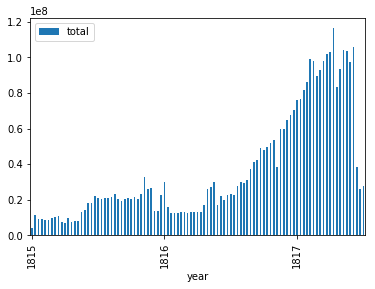

In [96]:
p = counts.plot(x = "year", y = ['total'], kind="bar")
#p.xaxis.set_major_locator(plt.MaxNLocator(3))
#plt.savefig("plot.png", dpi=800)

In [98]:
countsp1 = counts[0:40]


In [99]:
sum(list(countsp1.total)) / 1.

649274891.0

In [3]:
pd.read_csv(csv_filenames[0], sep = "\t")

,id,date,paper_title,issue_id,page_id,page,n_pages,image_url,ocr_url,ocr,min_x,min_y,max_x,max_y,w,h,area
0,ddd:000017182:mpeg21:a0005,1870/01/31 00:00:00,Het nieuws van den dag : kleine courant,ddd:000017182:mpeg21,ddd:000017182:mpeg21:p002,2,2,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:00001718...,Binnenlandsch Nieuws. Mr. D. Everwijn. Raad va...,2580,743,3315,3637,735,2894,1732769
1,ddd:000017182:mpeg21:a0001,1870/01/31 00:00:00,Het nieuws van den dag : kleine courant,ddd:000017182:mpeg21,ddd:000017182:mpeg21:p001,1,2,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:00001718...,Het Metrieke Stelsel. Eindelijk schijnt het da...,43,1205,2473,3677,2430,2472,4045479
2,ddd:000017182:mpeg21:a0003,1870/01/31 00:00:00,Het nieuws van den dag : kleine courant,ddd:000017182:mpeg21,ddd:000017182:mpeg21:p001,1,2,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:00001718...,Weezenverpleging. Tegen 20 April e. k. is alhi...,1697,1200,3299,3676,1602,2476,2624919
3,ddd:000017182:mpeg21:a0004,1870/01/31 00:00:00,Het nieuws van den dag : kleine courant,ddd:000017182:mpeg21,ddd:000017182:mpeg21:p001,1,2,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:00001718...,"Buitenlandsch Nieuws. Amsterdam, 29 Jan. 1870 ...",80,28,3338,3682,3258,3654,8724362
4,ddd:000017182:mpeg21:a0002,1870/01/31 00:00:00,Het nieuws van den dag : kleine courant,ddd:000017182:mpeg21,ddd:000017182:mpeg21:p001,1,2,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:00001718...,FEUILLETON. DE JONKMAN VAN GOUDA. EEN NEDERLAN...,51,3709,3300,4822,3249,1113,6280223
5,ddd:000017183:mpeg21:a0007,1870/03/15 00:00:00,Het nieuws van den dag : kleine courant,ddd:000017183:mpeg21,ddd:000017183:mpeg21:p003,3,6,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:00001718...,"'¦ Hert©jr«kH»OM""n- Lt Jan. ümgsdag jl. Lg doo...",59,1556,817,2750,758,1194,898013
6,ddd:000017183:mpeg21:a0002,1870/03/15 00:00:00,Het nieuws van den dag : kleine courant,ddd:000017183:mpeg21,ddd:000017183:mpeg21:p001,1,6,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:00001718...,Wat wil men toch in Nederland? 1. eigenlijk ee...,81,971,3291,3630,3210,2659,5930913
7,ddd:000017183:mpeg21:a0003,1870/03/15 00:00:00,Het nieuws van den dag : kleine courant,ddd:000017183:mpeg21,ddd:000017183:mpeg21:p001,1,6,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:00001718...,FEUILLETON. MISLUKTE BELEEFDHEID. Sa VAN EEN A...,41,3615,3315,4835,3274,1220,6648600
8,ddd:000017183:mpeg21:a0004,1870/03/15 00:00:00,Het nieuws van den dag : kleine courant,ddd:000017183:mpeg21,ddd:000017183:mpeg21:p001,1,6,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:00001718...,"Buitenlandsch Nieuws. AMSTERDAM, 14 Maart, '70...",64,64,3301,3604,3237,3540,4390946
9,ddd:000017183:mpeg21:a0005,1870/03/15 00:00:00,Het nieuws van den dag : kleine courant,ddd:000017183:mpeg21,ddd:000017183:mpeg21:p002,2,6,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:00001718...,Binnenlandsch Nieuws. Z. M. de Koning is heden...,892,53,3329,3573,2437,3520,5507062
